In [1]:
#Description: This program uses the Bollinger Bands and RSI to determine when to buy and sell stock

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Define a function to create and get the Bollinger Bands
def bollinger_bands(data,window_size = 30):
    rolling_mean = data['Close'].rolling(window=window_size).mean()#Simple Moving Average (SMA)
    rolling_std = data['Close'].rolling(window=window_size).std()
    data['UpperBand'] = rolling_mean + (2 * rolling_std)
    data['LowerBand'] = rolling_mean - (2 * rolling_std)
    return data

In [3]:
#Define a function to create and get the Relative Strength Index (RSI)
def RSI(data,window = 13):
    delta = data['Close'].diff()
    gain = delta.where (delta> 0, 0)
    loss = delta.where (delta <0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain / avg_loss
    RSI = 100 - (100/(1+RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data

In [5]:
#Define a function to create and get the trading strategy
#Buy when the close price goes below the Lower Band and the RSI is less than 30 and I currently do not have a position
#Sell when the close price goes above the Upper Band and the RSI is greater than 70 and I currently have a position
def strategy(data):
    position = 0
    buy_price = []
    sell_price = []
    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
            position = 1
            buy_price.append(data['Close'][i])
            sell_price.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
            position = 0
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    
    return (buy_price, sell_price)

In [7]:
#Get the stock data
data = pd.read_csv("/Users/mymac/Documents/PythonLab/MoneyMagnet/Symbols/Stocks/AAPL.csv")
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723602,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100
...,...,...,...,...,...,...,...
612,2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300
613,2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300
614,2024-06-13,214.740005,216.750000,211.600006,214.240005,214.240005,97862700
615,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,69175600


In [8]:
#Add the Bollinger Bands to the data set
data = bollinger_bands(data)

In [9]:
#Add the RSI to the data set
data = RSI(data)

In [10]:
#Implement the trading strategy
buy_price, sell_price = strategy(data)
data['Buy'] = buy_price
data['Sell'] = sell_price

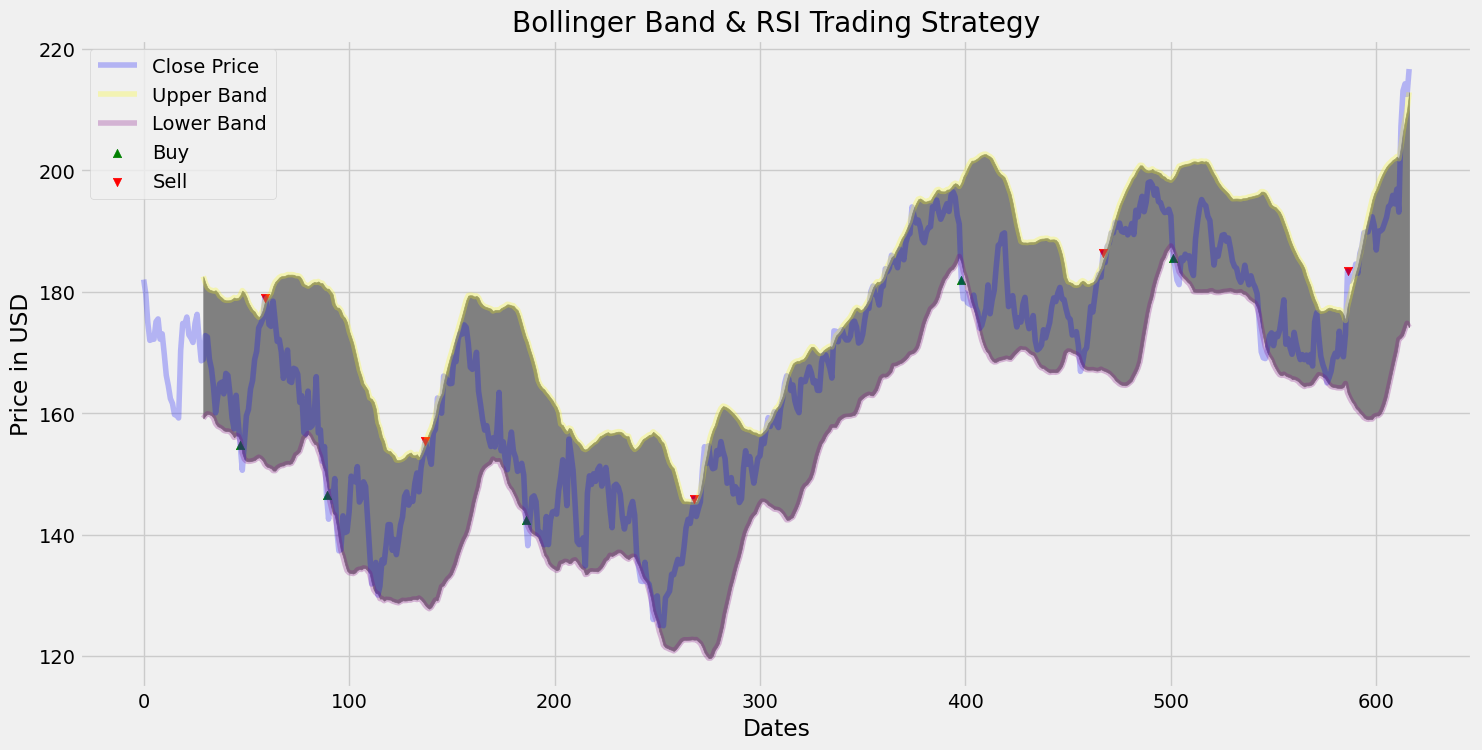

In [11]:
#Plot the close price, Bollinger Bands and the trading signals (Buy and Sell signals)
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Bollinger Band & RSI Trading Strategy')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
ax.plot(data['Close'], label= 'Close Price', alpha = 0.25, color='blue')
ax.plot(data['UpperBand'], label= 'Upper Band', alpha = 0.25, color='yellow')
ax.plot(data['LowerBand'], label= 'Lower Band', alpha = 0.25, color='purple')
ax.fill_between(data.index, data['UpperBand'], data['LowerBand'], color='grey')
ax.scatter(data.index, data['Buy'], label='Buy', alpha=1, marker = '^', color='green')
ax.scatter(data.index, data['Sell'], label='Sell', alpha=1, marker = 'v', color='red')
plt.legend()
plt.show()